### Collect the price of a company over the specific period

In [1]:
# collect price of samsung electronics


# price sources from naver finance
# 1 https://fchart.stock.naver.com/sise.nhn?symbol=005930&timeframe=day&count=1500&requestType=0
# 2  https://api.finance.naver.com/siseJson.naver?symbol=005930&requestType=1&startTime=20210214&endTime=20210726&timeframe=day




In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import re
from scraper import get_ticker


In [ ]:
def get_price_history(company_name):
    price_history = []
    return price_history

In [3]:
from dateutil.relativedelta import relativedelta

company_name = '삼성전자'
ticker = get_ticker(company_name)

today = datetime.datetime.today()
five_yrs_ago = datetime.datetime.today() - relativedelta(years=5)
startTime = five_yrs_ago.strftime('%Y%m%d')
endTime = today.strftime('%Y%m%d')   #YYYYMMDD
timeframe = 'day'

url = 'https://api.finance.naver.com/siseJson.naver?symbol='+ticker+'&requestType=1&startTime='+startTime+'&endTime='+endTime+'&timeframe='+timeframe

In [4]:
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')

In [5]:
# convert string into a pandas dataframe using pd.read_csv
import io
data_string = io.StringIO(soup.text)
df = pd.read_csv(data_string)


### Data Cleansing

In [6]:
# drop rows and columns with NaN
df = df.dropna(thresh = 3,axis=1)
df = df.dropna(thresh = 3, axis=0)

# clean column names (remove trash char)
for _column in df.columns:
    df = df.rename(columns={_column: _column.replace('[','').replace(']','').replace("'","").replace(' ','')})

In [7]:
def parse_number(string, type):
    try:
        number = type(re.search('[\d.]+', string)[0])
        return number
    except Exception as e:
        print("error occurred in parse_number: ", e)
        return string

# clean '날짜' column
for index,_ in enumerate(df['날짜']):
    _dateint = parse_number(str(df.loc[index, '날짜']), int)
    df.loc[index, '날짜'] = datetime.datetime.strptime(f'{_dateint}', '%Y%m%d').date()

# clean '외국인소진율' column
for index,_ in enumerate(df['외국인소진율']):
   df.loc[index, '외국인소진율'] = parse_number(str(df.loc[index, '외국인소진율']), float)

# change data type from float to int
df[['시가', '고가', '저가', '종가', '거래량']] = df[['시가', '고가', '저가', '종가', '거래량']].astype(int)


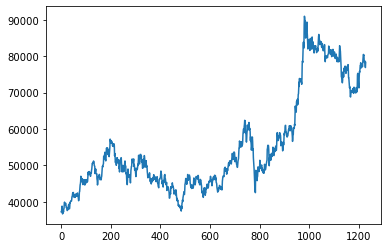

In [17]:
import matplotlib.pyplot as plt
plt.plot(df['종가'])